## Q1: I love pip 

- Take a piece of python code you wrote (for instance pick one of the exercises you've done for this class). 
- Turn it into a module
- Install it locally
- Deploy on pypi (only using the test-pypi server!)

---

I took the decorator from exercise 2 of lesson 7, turned it into a module, installed it locally, and then deployed it on TestPyPI. I tried using it on the same example from exercise 2 of lesson 7, and everything works.

In [262]:
import module_myplot

In [264]:
import module_myplot
print(module_myplot.__file__)

C:\Users\rebyn\anaconda3\Lib\site-packages\module_myplot_2025-0.0.1-py3.12.egg\module_myplot\__init__.py


In [266]:
import numpy as np

# --- Plot function ---
def ex_plot(x, y):

    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111)
    ax.plot(x, y, marker='o', linestyle='-')
    ax.set_xlabel("x []")
    ax.set_ylabel("y []")
    ax.set_title("Example")
    ax.set_xscale('log')
    ax.set_yscale('log')

    return fig

# --- Generate example data ---
x = np.array([10, 50, 100, 500, 1000, 5000, 10000])
y = x**2

[myplot] Figure saved to: .\plot_example.pdf


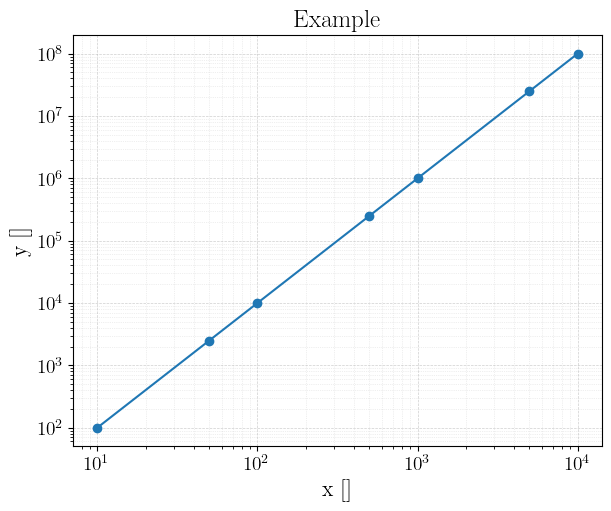

In [268]:
# --- Plot using your decorator ---
d_plot = module_myplot.myplot(ex_plot)
d_plot(x, y, filename="plot_example")

Module 'module-myplot-2025' version 0.0.1 has been uploaded to the TestPyPI server:

https://test.pypi.org/project/module-myplot-2025/0.0.1/

## Q4: So slow

Pick a piece of your code that you dislike. It's sooooo slooooow. 
- Profile it.
- Find the bottleneck.
- Rewrite that bottleneck making a better use of numpy arrays, or jitting it with Numba.
- Enjoy your faster code

In [233]:
from scipy.optimize import minimize
import math
import numpy as np
import cProfile

In [235]:
# --- Slow function ---
def slow_square_sum():

    n=int(5e3)
    total = 0.0
    
    for i in range(n):
        for j in range(n):
            total += math.sqrt(i * j)

    return total

In [237]:
slow_square_sum()

55538792432.84806

In [238]:
cProfile.run('slow_square_sum()', sort='cumtime')

         25000230 function calls (25000224 primitive calls) in 14.009 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000   12.968    3.242 base_events.py:1909(_run_once)
        3    0.000    0.000   10.011    3.337 windows_events.py:443(select)
        3    0.000    0.000   10.011    3.337 windows_events.py:761(_poll)
        3    6.049    2.016   10.011    3.337 {built-in method _overlapped.GetQueuedCompletionStatus}
 25000000    6.170    0.000    6.170    0.000 {built-in method math.sqrt}
        1    0.000    0.000    2.956    2.956 {built-in method builtins.exec}
        1    0.000    0.000    2.956    2.956 <string>:1(<module>)
        1    1.779    1.779    2.956    2.956 1047022264.py:2(slow_square_sum)
        2    0.010    0.005    0.016    0.008 {method '__exit__' of 'sqlite3.Connection' objects}
        4    0.000    0.000    0.000    0.000 events.py:86(_run)
        4    0.000    0.00

In [239]:
with cProfile.Profile() as pr:
    slow_square_sum()  

pr.dump_stats('slow_square_sum.prof')

In [270]:
# --- Faster function, using NumPy arrays ---
def numpy_sqrt_sum():

    n=int(5e3)
    i = np.arange(n)
    j = np.arange(n)
    
    prod = np.outer(i, j) # create a nxn matrix as prod[a, b] = i[a] * j[b]
    
    return np.sqrt(prod).sum()

In [255]:
numpy_sqrt_sum()

55538792432.8614

In [259]:
cProfile.run('numpy_sqrt_sum()', sort='cumtime')

         87 function calls in 0.260 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.010    0.010    0.255    0.255 <string>:1(<module>)
        1    0.148    0.148    0.245    0.245 570603973.py:2(numpy_sqrt_sum)
        1    0.050    0.050    0.050    0.050 numeric.py:841(outer)
        1    0.000    0.000    0.047    0.047 {method 'sum' of 'numpy.ndarray' objects}
        1    0.000    0.000    0.047    0.047 _methods.py:47(_sum)
        1    0.047    0.047    0.047    0.047 {method 'reduce' of 'numpy.ufunc' objects}
        2    0.004    0.002    0.004    0.002 {method '__exit__' of 'sqlite3.Connection' objects}
        2    0.000    0.000    0.000    0.000 traitlets.py:708(__set__)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        2    0.000    0.000    0.000    0.000 traitlets.py:3631(set)
        2    0.000    0.000    0.000    0.000 traitlets.py:68

In [242]:
with cProfile.Profile() as pr:
    numpy_sqrt_sum()

pr.dump_stats('numpy_sqrt_sum.prof')

Profiling Summary

Pure Python:
- Bottleneck: the double loop and 25M calls to math.sqrt.
- Result: very slow (~15 s).

NumPy version:
- Much faster than pure python (~0.26 s).

In [245]:
# Try with Numba

from numba import njit

# --- Same function as slow_square_sum but compiled with Numba ---
@njit
def numba_square_sum():

    n=int(5e3)
    total = 0.0
    
    for i in range(n):
        for j in range(n):
            total += math.sqrt(i * j)

    return total

In [246]:
cProfile.run('numba_square_sum()', sort='cumtime')

         164816 function calls (153824 primitive calls) in 0.429 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.424    0.424 <string>:1(<module>)
        1    0.000    0.000    0.320    0.320 dispatcher.py:343(_compile_for_args)
        1    0.000    0.000    0.320    0.320 dispatcher.py:859(compile)
        1    0.000    0.000    0.320    0.320 dispatcher.py:79(compile)
        1    0.000    0.000    0.319    0.319 dispatcher.py:86(_compile_cached)
        1    0.000    0.000    0.319    0.319 dispatcher.py:101(_compile_core)
        1    0.000    0.000    0.319    0.319 compiler.py:718(compile_extra)
        1    0.000    0.000    0.319    0.319 compiler.py:432(compile_extra)
        1    0.000    0.000    0.319    0.319 compiler.py:501(_compile_bytecode)
        1    0.000    0.000    0.314    0.314 compiler.py:455(_compile_core)
        1    0.000    0.000    0.312    0.312 compiler_m